In [3]:
import networkx as nx
import wikipediaapi
import numpy as np
import matplotlib.pyplot as plt
from karateclub.node_embedding.neighbourhood import DeepWalk
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Wikipedia-API initialisieren mit User-Agent
wiki = wikipediaapi.Wikipedia(
    language="en",
    user_agent="MyKIProject/1.0 (mailto:your-email@example.com)"
)

In [5]:
# Liste der Wikipedia-Artikel zum Thema KI
articles = [
    "Artificial intelligence", "Machine learning", "Deep learning", "Neural network",
    "Computer vision", "Natural language processing", "Reinforcement learning",
    "Expert system", "Turing test", "Supervised learning"
]

In [6]:
articles

['Artificial intelligence',
 'Machine learning',
 'Deep learning',
 'Neural network',
 'Computer vision',
 'Natural language processing',
 'Reinforcement learning',
 'Expert system',
 'Turing test',
 'Supervised learning']

In [7]:
# Graph erstellen
G = nx.Graph()

In [8]:
# Artikel und Verlinkungen hinzufügen
for article in articles:
    page = wiki.page(article)
    if not page.exists():
        continue
    G.add_node(article)
    for link in page.links:
        if link in articles:  # Nur interne Links innerhalb unserer Artikel nutzen
            G.add_edge(article, link)

In [9]:
print(type(G))
print(G.nodes) # Liste alle Knoten im Graphen auf
print(G.edges) # Liste alle Kanten im Graphen auf

<class 'networkx.classes.graph.Graph'>
['Artificial intelligence', 'Computer vision', 'Deep learning', 'Expert system', 'Machine learning', 'Natural language processing', 'Reinforcement learning', 'Supervised learning', 'Turing test', 'Neural network']
[('Artificial intelligence', 'Computer vision'), ('Artificial intelligence', 'Deep learning'), ('Artificial intelligence', 'Expert system'), ('Artificial intelligence', 'Machine learning'), ('Artificial intelligence', 'Natural language processing'), ('Artificial intelligence', 'Reinforcement learning'), ('Artificial intelligence', 'Supervised learning'), ('Artificial intelligence', 'Turing test'), ('Artificial intelligence', 'Neural network'), ('Computer vision', 'Machine learning'), ('Computer vision', 'Deep learning'), ('Computer vision', 'Natural language processing'), ('Computer vision', 'Turing test'), ('Computer vision', 'Reinforcement learning'), ('Computer vision', 'Supervised learning'), ('Deep learning', 'Machine learning'), ('

In [13]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 10
Number of edges: 30


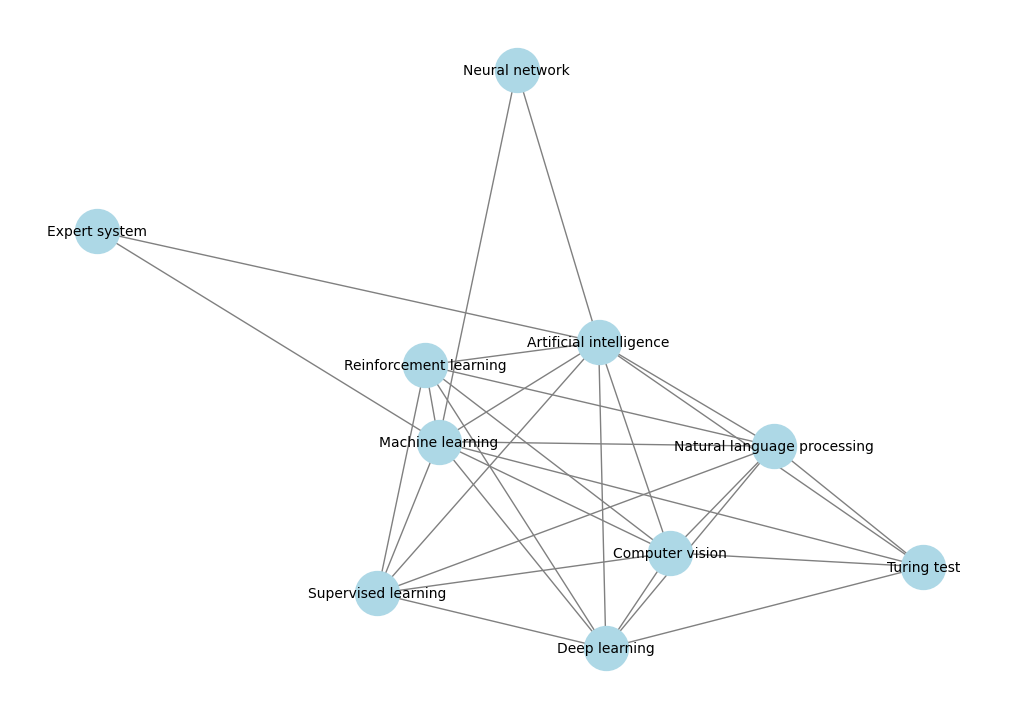

In [10]:
# Graph visualisieren
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=10)
plt.show()

In [11]:
# Knoten in numerische Indizes umwandeln
node_mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, node_mapping)

In [ ]:


# DeepWalk für Node Embeddings
deepwalk = DeepWalk(dimensions=3)
deepwalk.fit(G)
embedding = deepwalk.get_embedding()


In [ ]:
# Ähnlichkeit berechnen
similarity_matrix = cosine_similarity(embedding)

In [ ]:
# Ähnlichste Artikel ausgeben
article_indices = {i: articles[i] for i in range(len(articles))}
print("\nÄhnliche Wikipedia-Artikel zu 'Artificial intelligence':")
ai_index = articles.index("Artificial intelligence")
similarities = list(enumerate(similarity_matrix[ai_index]))
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
for i, score in similarities[1:6]:  # Die 5 ähnlichsten Artikel
    print(f"{article_indices[i]} (Score: {score:.4f})")


Ähnliche Wikipedia-Artikel zu 'Artificial intelligence':
Natural language processing (Score: 0.9979)
Turing test (Score: 0.9971)
Computer vision (Score: 0.9570)
Machine learning (Score: 0.9504)
Neural network (Score: 0.9490)


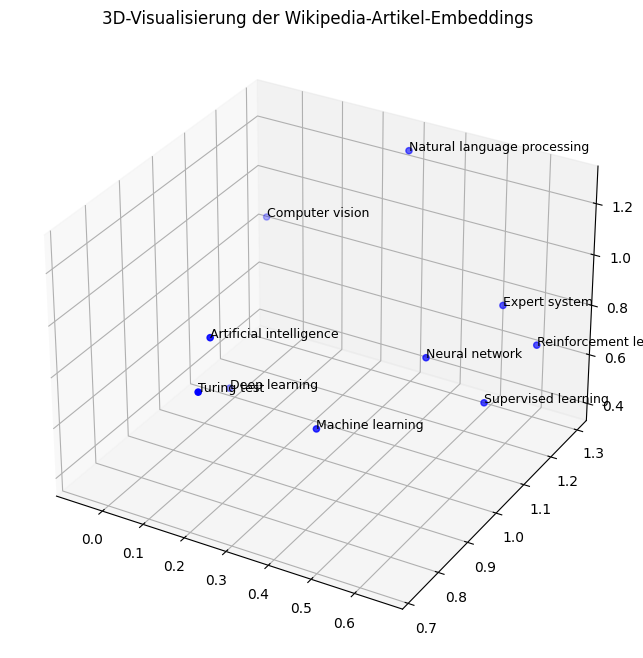

In [ ]:
# 3D-Visualisierung der Embeddings
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c='blue', label="Wikipedia-Artikel")
for i, article in enumerate(articles):
    ax.text(embedding[i, 0], embedding[i, 1], embedding[i, 2], article, fontsize=9)
plt.title("3D-Visualisierung der Wikipedia-Artikel-Embeddings")
plt.show()

Konvertieren des Graphens in RDF

In [ ]:
import rdflib
from rdflib import Graph as RDFGraph, Namespace, URIRef

# Definieren eines Namespaces:
EX = Namespace("http://example.org/wiki")

# Erstellen eines rdflib Graph-Objekts
rdf_graph = RDFGraph()

# Knoten und Kanten aus dem NetworkX-Graphen in RDF umwandeln
for node in G.nodes():
    rdf_graph.add((URIRef(EX[node]), EX.type, EX.Article))  # Artikel als RDF-Typ definieren

for edge in G.edges():
    rdf_graph.add((URIRef(EX[edge[0]]), EX.linksTo, URIRef(EX[edge[1]])))  # Links zwischen Artikeln

# Speichern als Turtle-Datei
rdf_graph.serialize("wiki_graph.ttl", format="turtle")


<Graph identifier=N63bf0db8806d414b86bd49d19ac8e094 (<class 'rdflib.graph.Graph'>)>

In [ ]:
from rdflib import Graph, Namespace, URIRef

# RDF Namespace
EX = Namespace("http://example.org/")

# RDF-Graph neu erstellen
rdf_graph = Graph()

# Knoten und Kanten hinzufügen
for node in G.nodes():
    rdf_graph.add((URIRef(EX[node]), EX.wikitype, EX.wikiArticle))  

for edge in G.edges():
    rdf_graph.add((URIRef(EX[edge[0]]), EX.wikilinksTo, URIRef(EX[edge[1]])))  

# Speichern als Turtle-Datei
rdf_graph.serialize("wiki_graph_fixed.ttl", format="turtle")

print("Graph wurde als 'wiki_graph_fixed.ttl' gespeichert!")


Graph wurde als 'wiki_graph_fixed.ttl' gespeichert!
